In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Data/train.csv')

In [3]:
df = df.iloc[:,[3,23,24,27,-1]]
df.head()

,com_reg_ver_win_rate,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner,is_converted
0,0.066667,0.003079,0.026846,0,True
1,0.066667,0.003079,0.026846,1,True
2,0.088889,0.003079,0.026846,2,True
3,0.088889,0.003079,0.026846,3,True
4,0.088889,0.003079,0.026846,4,True


In [4]:
df_test = pd.read_csv('../Data/submission.csv')
df_test = df_test.iloc[:,[-2,-1]]
df_test.head()

,lead_owner,is_converted
0,278,False
1,437,True
2,874,False
3,194,False
4,167,False


In [5]:
new_owner = set(df_test['lead_owner']) - set(df['lead_owner'])
print(f'submission에만 있는 lead_owner id 개수 : {len(new_owner)}')
print(sorted(new_owner))

submission에만 있는 lead_owner id 개수 : 85
[127, 135, 136, 308, 313, 315, 316, 320, 323, 327, 331, 336, 347, 353, 356, 373, 377, 379, 427, 554, 558, 562, 565, 571, 573, 576, 577, 581, 587, 588, 591, 595, 723, 727, 731, 733, 734, 735, 736, 747, 748, 749, 750, 751, 752, 766, 769, 772, 773, 777, 821, 828, 844, 850, 866, 867, 868, 874, 892, 907, 908, 911, 922, 960, 962, 963, 965, 966, 969, 978, 999, 1023, 1024, 1025, 1026, 1028, 1032, 1033, 1046, 1055, 1056, 1058, 1062, 1063, 1108]


In [6]:
new_owner_df = df_test[df_test['lead_owner'].isin(new_owner)]

In [7]:
new_owner_df['is_converted'].value_counts()

is_converted
False    422
True      24
Name: count, dtype: int64

In [8]:
df = df.drop_duplicates(subset='lead_owner', keep='first')
df['is_converted'].value_counts()

is_converted
False    735
True     249
Name: count, dtype: int64

In [8]:
df_cleaned = df.dropna()

In [9]:
df_cleaned = df_cleaned.iloc[:,:-2]
corr_matrix = df_cleaned.corr()

In [10]:
corr_matrix

,com_reg_ver_win_rate,ver_win_rate_x,ver_win_ratio_per_bu
com_reg_ver_win_rate,1.000000,-0.084367,0.446932
ver_win_rate_x,-0.084367,1.000000,0.034621
ver_win_ratio_per_bu,0.446932,0.034621,1.000000


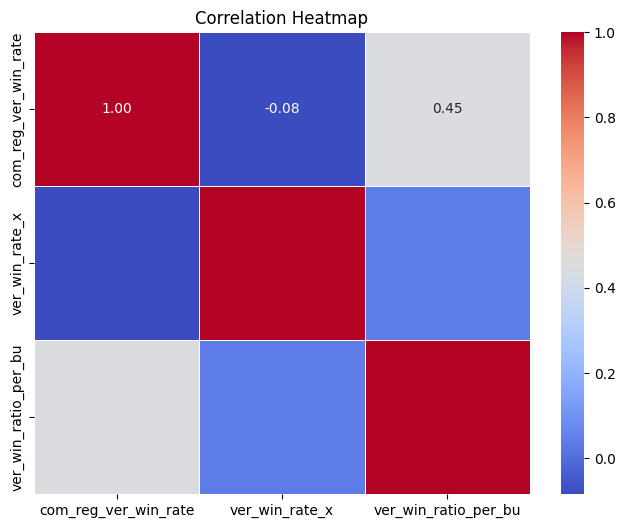

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()